1.   Create a **colored candlestick chart with daily market capitalization and simple moving average** lines for the company **Microsft** using the downloader of Yahoo finance, using **MatplotLib finance package**.
2.   Using the same information previously obtain (**Microsoft**), plot a **scatterplot** of the **close price** **with and without the weekends**, using **plotly**. Add also a **rangeslider**.
3.   Using plotly and Yahoo finance, create a new figure in paralalel with **3 stocks** (Apple, Microsoft, and google). **Show the head and tails **of the information and plot simultaneously, **without weekends** and including the **reangeslider**.
4. **Create the Black-Schles-Merton** equation to cover Call, Put Option. Take into account that to program in python the cumulative normal we will use the following command si.norm.cdf(d1), from the package statistical package of Scypy. To import please run this command:
`import scipy.stats as si`

You can check your results in the following website:
https://www.math.drexel.edu/~pg/fin/VanillaCalculator.html






In [1]:
import numpy as np #this code will allow you to work with numpy algorithms.
import scipy as sp #this will import interesting scientific functions
import pylab as plt # this code will allow you to work with graph library

!pip install mplfinance -q # -q for quiet
import mplfinance as mpf
import pandas as pd

from datetime import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


In [2]:
!pip install yfinance --quiet
import yfinance as yf

appl=yf.Ticker('APPL')
fb=yf.Ticker('META')
goog=yf.Ticker('GOOG')
amzn=yf.Ticker('AMZN')
sq=yf.Ticker('SQ')
tsla=yf.Ticker('TSLA')
gspc=yf.Ticker('GSPC')
ms=yf.Ticker('MSFT')

In [3]:
Microsoft = yf.download('MSFT',
                       start = '2023-01-01',
                       #end = '2023-08-15',
                       progress = False
                       )
Microsoft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,237.956329,25740000
2023-01-04,232.279999,232.869995,225.960007,229.100006,227.547363,50623400
2023-01-05,227.199997,227.550003,221.759995,222.309998,220.803360,39585600
2023-01-06,223.000000,225.759995,219.350006,224.929993,223.405609,43613600
2023-01-09,226.449997,231.240005,226.410004,227.119995,225.580765,27369800


1.
Colored candlestick chart with daily market price and simple moving average lines for the company Microsft using the downloader of Yahoo finance, using MatplotLib finance package.

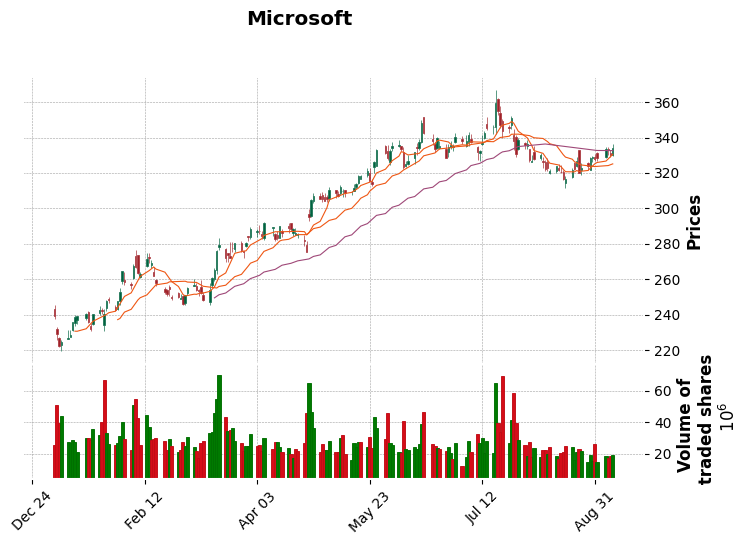

In [4]:
mpf.plot(Microsoft,
        type = 'candle',
        style =  'charles',
        title = 'Microsoft',
        ylabel = 'Prices',
        figratio=(12,8),
        volume = True,
        show_nontrading = True,
        ylabel_lower='Volume of \n traded shares',
        mav = (8, 20, 50))

2a. Scatter plot of Microsoft close price with weekend using plotly with rangeslider

In [5]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(x=Microsoft.index, y=Microsoft["Close"],
                 title="show Gaps with rangebreaks")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

2b. Scatter plot of Microsoft close price without weekend using plotly with rangeslider

In [6]:
fig = px.scatter(x=Microsoft.index, y=Microsoft["Close"],
                 title="show Gaps with rangebreaks")

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), #hide weekends
        dict(values=["2015-12-25", "2016-01-01"])  # hide Christmas and New Year's
    ]
)

fig.update_xaxes(rangeslider_visible=True)
fig.show()

3.Using plotly and Yahoo finance, create a new figure in paralalel with 3 stocks (Apple, Microsoft, and google). Show the head and tails *of the information and plot simultaneously, *without weekends and including the reangeslider.

In [7]:
Meta = yf.download('META',
                       start = '2023-01-01',
                       #end = '2023-08-15',
                       progress = False
                       )

Google = yf.download('GOOG',
                       start = '2023-01-01',
                       #end = '2023-08-15',
                       progress = False
                       )
Meta.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,122.820000,126.370003,122.279999,124.739998,124.739998,35528500
2023-01-04,127.379997,129.050003,125.849998,127.370003,127.370003,32397100
2023-01-05,126.129997,128.520004,124.540001,126.940002,126.940002,25447100
2023-01-06,128.970001,130.330002,126.040001,130.020004,130.020004,27584500
2023-01-09,131.160004,132.949997,129.279999,129.470001,129.470001,26649100


In [15]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=('Microsoft', 'Meta', 'Google'))

trace1 = go.Scatter(x=Microsoft.index, y=Microsoft['High'], mode='lines',name='Microsoft')
fig.add_trace(trace1, row=1, col=1)

trace1 = go.Scatter(x=Meta.index, y=Meta['High'], mode='lines', name='Meta')
fig.add_trace(trace1, row=1, col=2)

trace1 = go.Scatter(x=Google.index, y=Google['High'], mode='lines', name='Google')
fig.add_trace(trace1, row=1, col=3)

4.**Create the Black-Scholes-Merton** equation to cover Call, Put Option. Take into account that to program in python the cumulative normal we will use the following command si.norm.cdf(d1), from the package statistical package of Scypy. To import please run this command:
`import scipy.stats as si`

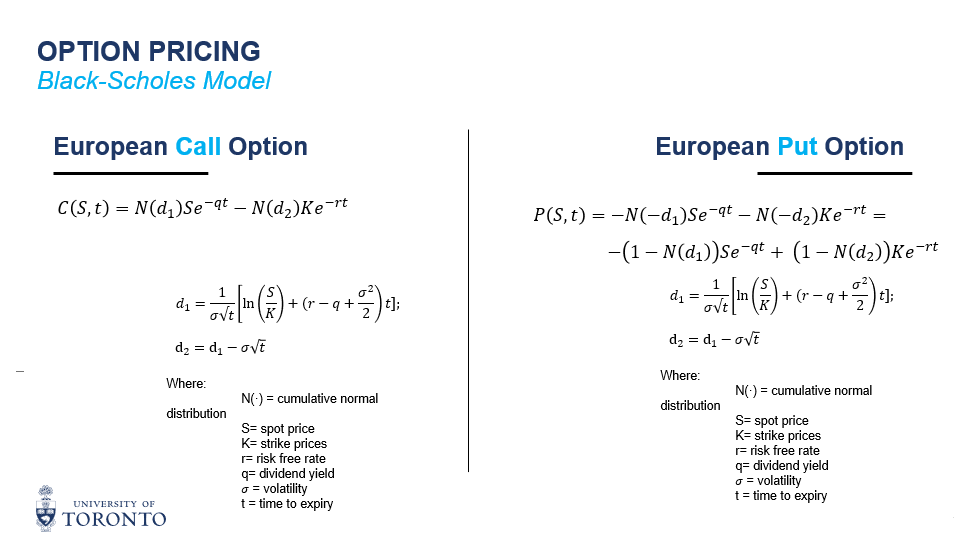

In [16]:
import numpy as np
import scipy.stats as si
import sympy as sy
#import sympy.statistics as systats

In [18]:
def European_Call_Option (S,K,r,q,sigma,t):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    #q: dividend yield (usually 0)

    d1 = 1/(sigma*np.sqrt(t))*(np.log(S/K)+(r-q+(sigma**2)/2)*t)
    d2 = d1 - sigma*np.sqrt(t)
    call = si.norm.cdf(d1)*S*np.exp(-q*t) - si.norm.cdf(d2)*K*np.exp(-r*t)

    return call

In [20]:
European_Call_Option (50,100,0.05,0,0.25,1)

0.027352509369436673

In [31]:
def European_Put_Option (S,K,r,q,sigma,t):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    #q: dividend yield (usually 0)

    d1 = 1/(sigma*np.sqrt(t))*(np.log(S/K)+(r-q+(sigma**2)/2)*t)
    d2 = d1 - sigma*np.sqrt(t)
    put = -si.norm.cdf(-d1)*S*np.exp(-q*t) - si.norm.cdf(-d2)*K*np.exp(-r*t)

    return put

In [30]:
European_Put_Option (50, 100, 0.05, 0, 0.20, 1)

-45.125341867624705